<a href="https://colab.research.google.com/github/Cepera90/test/blob/main/test_3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [37]:
# Import libraries
import numpy as np
import pandas as pd
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
import seaborn as sns

In [47]:
# Open inc_points_c
TC = pd.read_csv("/content/drive/MyDrive/test/inc_points_c.csv")

In [28]:
TC.columns

Index(['Unnamed: 0', 'IncomingTrackId', 'Speed', 'Latitude', 'Longitude',
       'PointDate', 'Height', 'Acceleration', 'Deceleration', 'TickTimestamp',
       'AccelerationXOriginal', 'AccelerationYOriginal',
       'AccelerationZOriginal', 'TrackOrigin', 'os_version'],
      dtype='object')

In [48]:
#Leave the numeric data inc point, IncomingTrackId and track origin
TC = TC.drop(['Unnamed: 0','os_version','TickTimestamp','PointDate', 'IncomingTrackId'], axis=1)

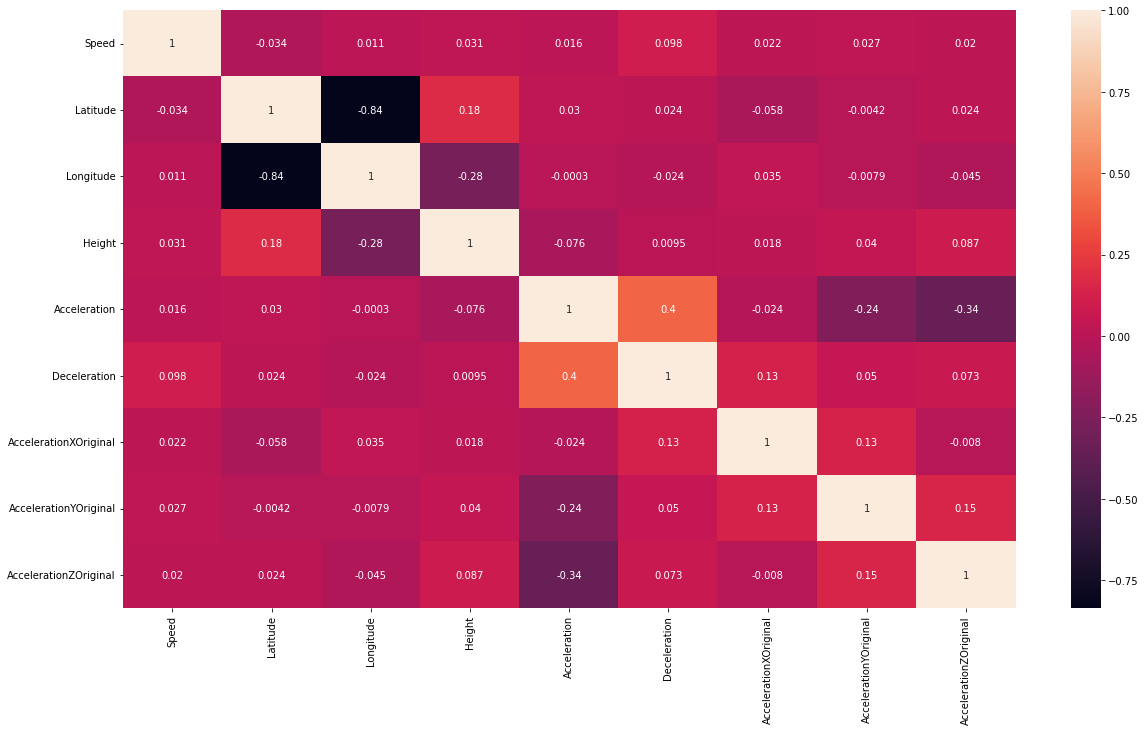

In [50]:
#See correlation in data
corr = TC.corr()

plt.figure(figsize = (20, 11)) 
sns.heatmap(corr,annot=True)

In [51]:
#Leave the Latitude, Longitude and Height columns for anonimized data
TC = TC.drop(['Latitude','Longitude','Height'], axis=1)

In [52]:
#Prepare data
X = TC.loc[:,TC.columns != 'TrackOrigin']
y = TC.loc[:,'TrackOrigin']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

In [53]:
# DecisionTreeClassifier model train
model = DecisionTreeClassifier()
model.fit(X_train, y_train)

DecisionTreeClassifier()

In [54]:
# DecisionTreeClassifier model prediction
DTC_pred = model.predict(X_test)

In [55]:
# Accuracy score and roc_auc_score
print(accuracy_score(DTC_pred, y_test))

0.7565104677596143


In [56]:
model.feature_importances_

array([0.21439385, 0.06293776, 0.03028617, 0.22590041, 0.23661059,
       0.22987121])